In [ ]:
import pandas as pd

In [ ]:
diabetes_data=pd.read_csv('diabetes.csv')

In [ ]:
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
diabetes_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
df1=diabetes_data[diabetes_data['Outcome']==0]
df2=diabetes_data[diabetes_data['Outcome']==1]
df1=df1.sample(n=268)

In [ ]:
df1.shape

(268, 9)

In [ ]:
new_diabetes=pd.concat([df1,df2])

In [ ]:
new_diabetes.shape

(536, 9)

In [ ]:
import seaborn as sns

<Axes: xlabel='Outcome', ylabel='count'>

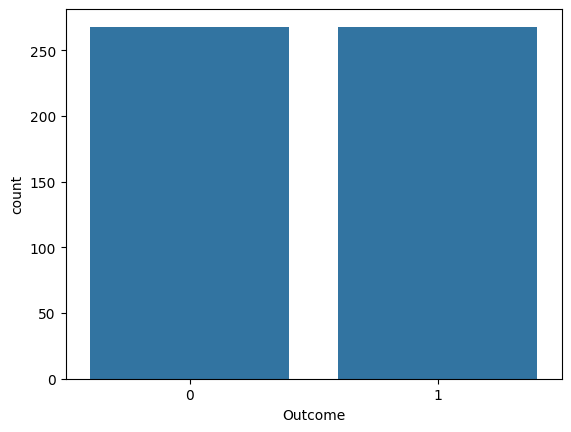

In [ ]:
sns.countplot(x='Outcome',data=new_diabetes)

In [ ]:
new_diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
x=new_diabetes.drop(['Outcome'],axis=1)
y=new_diabetes['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=50)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min=MinMaxScaler()
x_train=min.fit_transform(x_train)
x_test=min.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(n_estimators=100)


In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
pred=rf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))

0.6851851851851852
